 # Customer Spending Dataset

Summary in here.

## Data Preparation and Cleaning

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [32]:
dataset[dataset["Age"].isna() | dataset["Age"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [33]:
dataset[dataset["CustomerID"].isna() | dataset["CustomerID"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [34]:
dataset[dataset["Annual_Income_(k$)"].isna() | dataset["Annual_Income_(k$)"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [35]:
dataset[dataset["Spending_Score"].isna() | dataset["Spending_Score"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


## Exploratory Data Analysis

In [36]:
dataset.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


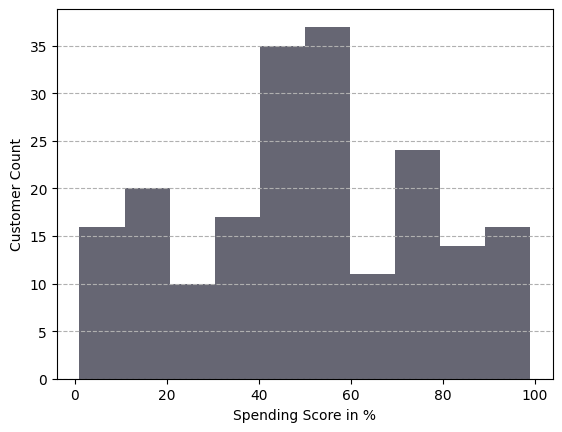

In [51]:
scores = dataset.Spending_Score
fig, ax = plt.subplots()
ax.hist(scores, color=(0.4,0.4,0.45))
ax.set_xlabel("Spending Score in %")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--')
plt.show()

## Visualization